# Emission Standards

New vehicles have to pass emission standards, which have been constantly tightening. Your job is to take the testing report and determine whether or not the vehicle passes the test, and with what confidence.

Simply because I am an Aussie, let's use the latest Australian Emission requirements [here](https://infrastructure.gov.au/vehicles/environment/emission/files/Emission_Standards_for_Petrol_Cars.pdf).

It says that the maximum CO content is 1.0g/kg. Emission data samples are located in `emission_small.txt` and `emission_large.txt`. We'll analyse both datasets independently.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm
data_small = np.loadtxt("data\emission_small.txt")
data_large = np.loadtxt("data\emission_large.txt")
standard = 1

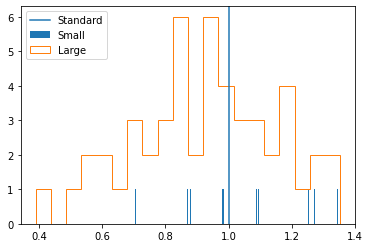

In [2]:
# Remember, always visualise your data
plt.hist(data_small, bins=200, label="Small")
plt.hist(data_large, bins=20, histtype="step", label="Large")
plt.axvline(standard, label="Standard")
plt.legend(loc=2);

# Using the small dataset

As these observations are supposed to be representative of an underlying true value with uncertainty, we can normally approximate the distribution of observables as a normal. However, because we have low statistics (10 observations), we should instead use the Student-t distribution with 10 degrees of freedom.

In [3]:
mean, std = data_small.mean(), data_small.std() / np.sqrt(data_small.size)
xs = np.linspace(0.5, 1.4, 200)
ps = t.pdf(xs, 10, mean, std)
prob_fail = t.sf(standard, 10, mean, std)
print(f"There is a {100 * prob_fail:.2f}% chance that the vehicle fails emission testing")

There is a 77.33% chance that the vehicle fails emission testing


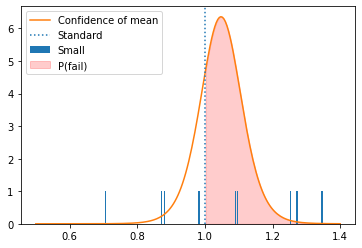

In [4]:
# Let's visualise again
plt.hist(data_small, bins=200, label="Small")
plt.plot(xs, ps, label="Confidence of mean")
plt.axvline(1, ls=":", label="Standard")
plt.fill_between(xs, ps, 0, where=xs>=standard, alpha=0.2, color='r', label="P(fail)")
plt.legend(loc=2);

This isn't good for the company! At the moment, we do **not** have confidence that their new vehicle passes the emission standard. We should ask for more data.  We can reject the hypothesis that we have confidence their vehicle passes the standard.

### Large Dataset

With the larger dataset, we have enough points that we can use the normal approximation (as the degrees of freedom increases, Student-T approaches a normal). >30 datapoints is a good estimate.

There is a 98.8% chance that the vehicle passes emission testing


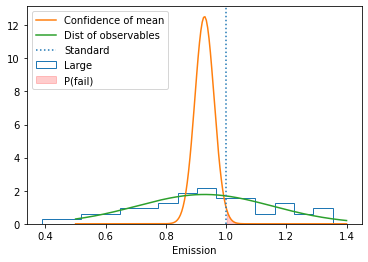

In [5]:
mean, std = data_large.mean(), data_large.std() / np.sqrt(data_large.size)
xs = np.linspace(0.5, 1.4, 200)
ps = norm.pdf(xs, mean, std)
prob_pass = norm.cdf(standard, mean, std)
print(f"There is a {100 * prob_pass:.1f}% chance that the vehicle passes emission testing")

# Let's visualise again
plt.hist(data_large, bins=15, histtype="step", density=True, label="Large")
plt.plot(xs, ps, label="Confidence of mean")
plt.plot(xs, norm.pdf(xs, mean, data_large.std()), label="Dist of observables")
plt.axvline(1, ls=":", label="Standard")
plt.fill_between(xs, ps, 0, where=xs>=standard, alpha=0.2, color='r', label="P(fail)")
plt.legend(loc=2)
plt.xlabel("Emission");